In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from hydranerv.model.network import Network

In [ ]:
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color

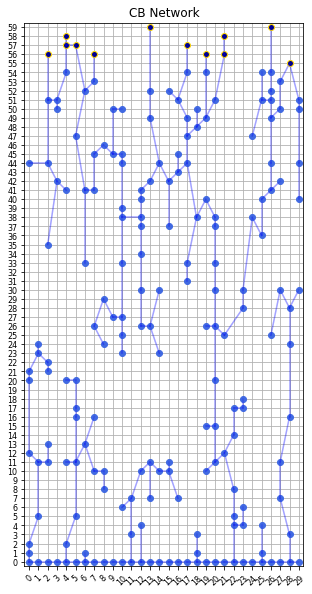

In [74]:
cbnetwork = Network(type="CB", 
                  numx=30, 
                  numy=60, 
                  neuron_density=0.1, 
                  pacemaker_density=1,
                  link_maxdist=2, 
                  link_density=0.2,
                  gc=20000,
                  theta_amp=150)
cbnetwork.display()

In [70]:
T = 100000
dt = 1
theta_train = np.zeros((int(T/dt)+1, 30, 60))
light_train = np.zeros((int(T/dt)+1, 30, 60))
i_stim_train = np.zeros((int(T/dt)+1, 30, 60))

for t in tqdm(np.arange(0, T+dt, dt)):
    cbnetwork.step(t, theta_train[int(t/dt)], light_train[int(t/dt)], i_stim_train[int(t/dt)])

100%|██████████| 100001/100001 [02:03<00:00, 809.98it/s]


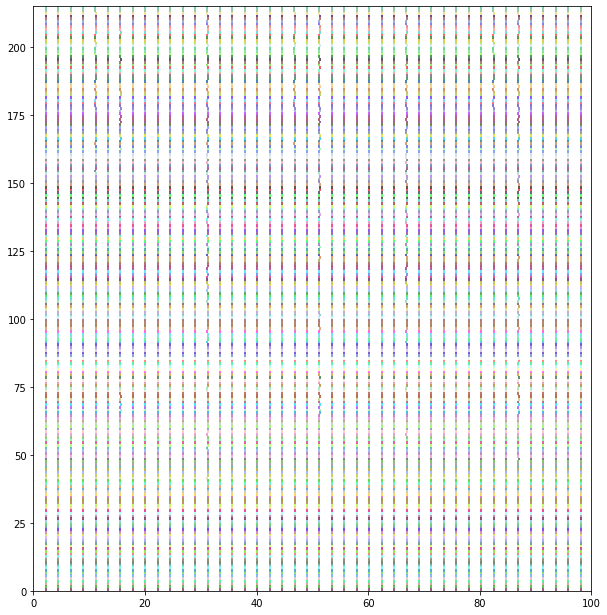

In [71]:
plt.figure(figsize=(10, 0.05*len(cbnetwork.neurons)))

neurons = cbnetwork.neurons

for k, neuron in enumerate(neurons.values()):
    color = randomcolor()
    for i in range(len(neuron.spike_train)):
        spike = neuron.spike_train[i]
        if spike:
            plt.vlines(i/1000, k, k+1, color)

plt.xlim(0, T/1000)
plt.ylim(0, len(cbnetwork.neurons))
plt.show()

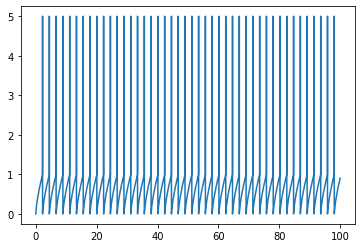

In [72]:
plt.plot(np.arange(0, (T+dt) / 1000, dt / 1000), list(neurons.values())[-1].v_train)